In [ ]:
%cd /content/drive/MyDrive/"Colab Notebooks"/MCUT/R911R912
!pwd
!ls

/content/drive/MyDrive/Colab Notebooks/MCUT/R911R912
/content/drive/MyDrive/Colab Notebooks/MCUT/R911R912
 ARO1_1.ipynb   ARO2.ipynb		 'R911R912 _明志蔡教授_R2.xlsx'
 ARO1.ipynb    'R911R912 _ARO1_R2.xlsx'
 ARO2_1.ipynb   R911R912.pptx


In [ ]:
import pandas as pd
path = "R911R912 _明志蔡教授_R2.xlsx"
xls = pd.ExcelFile(path)
sheets = xls.sheet_names
display(sheets)

['R911R912_TAG清單',
 'R911R912_TAG相關錶點資料(停用)',
 'R911R912_TAG相關錶點資料(X)',
 '目標值(Y)相關錶點資料']

In [ ]:
df = xls.parse(sheets[2])
df.columns.values[2] = "time"
df = df.iloc[:,2:]
for i in df.columns[1:]:
  df[i] = pd.to_numeric(df[i],errors='coerce')

df

,time,ARO2-DCS-FI91304,ARO2-DCS-FI91401,ARO2-DCS-FI914A2,ARO2-DCS-FI914A3,ARO2-DCS-FI914B2,ARO2-DCS-FI914B3,ARO2-DCS-FI91501,ARO2-DCS-FI91502,ARO2-DCS-FI91503,ARO2-DCS-FI91504,ARO2-DCS-FI91601,ARO2-DCS-FI91602,ARO2-DCS-FI91701,ARO2-DCS-FI91702,ARO2-DCS-FI91704,ARO2-DCS-FI91705,ARO2-DCS-FI93201,ARO2-DCS-FI94701,ARO2-DCS-FI94702,ARO2-DCS-FIC91101,ARO2-DCS-FIC91102,ARO2-DCS-FIC91103,ARO2-DCS-FIC91104,ARO2-DCS-FIC91201,ARO2-DCS-FIC91202,ARO2-DCS-FIC91203,ARO2-DCS-FIC91204,ARO2-DCS-FIC91301,ARO2-DCS-FIC91302,ARO2-DCS-FIC91303,ARO2-DCS-PI91301,ARO2-DCS-PI91303,ARO2-DCS-PI913A1,ARO2-DCS-PI913B1,ARO2-DCS-PI91605,ARO2-DCS-PI91606,ARO2-DCS-PI91705,ARO2-DCS-PI91706,ARO2-DCS-PIC91102,...,#900 LOADING.Value,ARO2-DCS-R911_2_A_FA,ARO2-DCS-R911_2_HF,ARO2-DCS-R911_2_L2_A,ARO2-DCS-R911_2_L3_A,ARO2-DCS-R911_2_L4_A,ARO2-DCS-R911_2_XF,ARO2-DCS-RV_CYC_T,ARO2-DCS-RV_STEP_T,ARO2-DCS-RV1_BED_P,ARO2-DCS-RV1_ZONE_P,ARO2-DCS-RV2_BED_P,ARO2-DCS-RV2_ZONE_P,ARO2-DCS-TI91101,ARO2-DCS-TI91102,ARO2-DCS-TI91103,ARO2-DCS-TI91201,ARO2-DCS-TI91202,ARO2-DCS-TI91203,ARO2-DCS-TI91401,ARO2-DCS-TI91501,ARO2-DCS-TI91502,ARO2-DCS-TI91602,ARO2-DCS-TI91701,ARO2-DCS-PDI91101,ARO2-DCS-PDI91201,ARO2-LIMS-S708@Br.Index,Unnamed: 72,ARO2-LIMS-S708@A9,Unnamed: 74,ARO2-LIMS-S708@A10+,Unnamed: 76,ARO2-LIMS-S708@Water,Unnamed: 78,ARO2-LIMS-S708@Sulfur,Unnamed: 80,新增補充錶點,ARO2-LIMS-s919@A9,ARO2-LIMS-s919@A10+,ARO2-LIMS-s919@Br.Index
0,2017-01-01 00:00:00,3.474542,1497.947144,1494.599609,1784.315796,1487.988403,1770.947021,25.988857,23.682142,25.698942,25.967953,568.646179,569.952087,620.703979,615.833862,43.765499,43.975185,902.855225,367.023285,359.723694,2.547352,0.697931,1.500730,0.102609,2.536275,0.102638,1.779679,0.700556,3.549894,3.512295,3.524819,0.037451,0.051119,NaN,NaN,1.596724,16.432173,0.000000,17.385298,8.838488,...,NaN,0.480,129.987991,0.315932,1.509901,-0.590059,122.012199,NaN,NaN,NaN,NaN,1.958136,2.0,182.125000,176.726746,178.312500,177.937500,182.982361,179.937500,186.015625,175.656250,173.800339,176.711975,178.199112,3.630703,3.090974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01 01:00:00,3.526301,1495.141602,1562.321289,1782.795166,1483.480591,1774.378052,23.068954,23.009315,22.766954,23.588520,559.993713,557.849182,607.068298,617.322144,43.105591,43.816513,903.495972,362.474274,364.867889,2.525834,0.700066,1.494781,0.099611,2.540714,0.101507,1.784207,0.700332,3.632102,3.479546,3.547161,0.031875,0.041250,NaN,NaN,1.650970,16.721058,0.000000,17.513103,8.769395,...,NaN,0.480,129.987991,0.315643,1.509901,-0.590059,122.012199,NaN,NaN,NaN,NaN,1.000000,2.0,182.469116,176.390808,177.937500,178.078308,183.031616,181.280151,186.789337,175.797424,173.995697,176.955658,178.028030,3.632458,2.996475,10.08,NaN,0.006,NaN,0.0,NaN,78.699997,NaN,0.04,NaN,NaN,614.0,5298.0,NaN
2,2017-01-01 02:00:00,3.509516,2083.710693,2066.136475,1804.128662,2071.642578,1793.949341,22.981131,22.855104,22.351837,22.650213,562.090881,562.743958,613.179688,619.972168,42.862934,43.622444,902.621216,371.956207,367.437836,2.499257,0.700596,1.490706,0.101244,2.516099,0.101998,1.767188,0.694860,3.574678,3.477507,3.600805,0.034445,0.043671,NaN,NaN,1.695312,16.772936,0.000000,17.578945,8.843875,...,NaN,0.480,129.987991,0.315122,1.509901,-0.590059,122.012199,NaN,NaN,NaN,NaN,24.000000,1.0,182.202911,177.125000,177.812500,178.688339,183.500839,181.811661,186.460876,176.192413,174.248077,176.993118,178.067184,3.639654,3.123798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-01 03:00:00,3.418442,2058.168213,2054.372314,1769.391846,2058.044189,1770.947021,23.034639,22.991415,22.577875,22.592945,569.152771,572.116577,616.875000,620.474792,42.818066,43.500248,905.850281,368.045868,364.526550,2.547298,0.699012,1.510756,0.101651,2.522335,0.100659,1.754644,0.692855,3.559808,3.512279,3.442147,0.031195,0.042301,NaN,NaN,1.751780,16.580011,0.000000,17.473253,8.809463,...,NaN,0.480,129.987991,0.314822,1.509901,-0.590059,122.012199,NaN,NaN,NaN,NaN,23.000000,1.0,181.610016,177.990494,177.2

In [ ]:
df.columns

Index(['time', 'ARO2-DCS-FI91304', 'ARO2-DCS-FI91401', 'ARO2-DCS-FI914A2',
       'ARO2-DCS-FI914A3', 'ARO2-DCS-FI914B2', 'ARO2-DCS-FI914B3',
       'ARO2-DCS-FI91501', 'ARO2-DCS-FI91502', 'ARO2-DCS-FI91503',
       'ARO2-DCS-FI91504', 'ARO2-DCS-FI91601', 'ARO2-DCS-FI91602',
       'ARO2-DCS-FI91701', 'ARO2-DCS-FI91702', 'ARO2-DCS-FI91704',
       'ARO2-DCS-FI91705', 'ARO2-DCS-FI93201', 'ARO2-DCS-FI94701',
       'ARO2-DCS-FI94702', 'ARO2-DCS-FIC91101', 'ARO2-DCS-FIC91102',
       'ARO2-DCS-FIC91103', 'ARO2-DCS-FIC91104', 'ARO2-DCS-FIC91201',
       'ARO2-DCS-FIC91202', 'ARO2-DCS-FIC91203', 'ARO2-DCS-FIC91204',
       'ARO2-DCS-FIC91301', 'ARO2-DCS-FIC91302', 'ARO2-DCS-FIC91303',
       'ARO2-DCS-PI91301', 'ARO2-DCS-PI91303', 'ARO2-DCS-PI913A1',
       'ARO2-DCS-PI913B1', 'ARO2-DCS-PI91605', 'ARO2-DCS-PI91606',
       'ARO2-DCS-PI91705', 'ARO2-DCS-PI91706', 'ARO2-DCS-PIC91102',
       'ARO2-DCS-PIC91202', 'ARO2-DCS-PIC91302', 'ARO2-DCS-PIC91304',
       '#900 LOADING.Value', 'ARO2-DCS-

In [ ]:
x_col = df.columns[df.columns.str.contains('_L')].tolist()+df.columns[df.columns.str.contains('FA')].tolist()
x_col = x_col + ["ARO2-DCS-R911_2_HF"]

In [ ]:
df_1 = xls.parse(sheets[3])
df_1.columns.values[1] = "time"
df_1 = df_1.iloc[:38497,1:]
for i in df_1.columns[1:]:
  df_1[i] = pd.to_numeric(df_1[i],errors='coerce')

df_1

,time,ARO2-LIMS-S708@PX,ARO2-LIMS-S907@PX,ARO2-LIMS-S905@PX,ARO2-LIMS-s922@EB,ARO2-LIMS-s922@PX,ARO2-LIMS-s922@MX,ARO2-LIMS-s922@OX,ARO2-DCS-PX@Recovery
0,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01 01:00:00,23.077,34.433998,0.409,768.0,99.699997,1330.0,521.0,96.28
2,2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
38492,2021-05-23 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38493,2021-05-23 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38494,2021-05-23 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38495,2021-05-23 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
y_col= ["ARO2-LIMS-S708@PX", "ARO2-LIMS-s922@PX", "ARO2-LIMS-s922@MX",
    "ARO2-LIMS-S907@PX", "ARO2-LIMS-S905@PX", "ARO2-DCS-PX@Recovery", "time"]

col = x_col + y_col

df_2 = df[x_col].join(df_1[y_col])

df_2

,ARO2-DCS-R911_2_L2_A,ARO2-DCS-R911_2_L3_A,ARO2-DCS-R911_2_L4_A,ARO2-DCS-R911_2_A_FA,ARO2-DCS-R911_2_HF,ARO2-LIMS-S708@PX,ARO2-LIMS-s922@PX,ARO2-LIMS-s922@MX,ARO2-LIMS-S907@PX,ARO2-LIMS-S905@PX,ARO2-DCS-PX@Recovery,time
0,0.315932,1.509901,-0.590059,0.480,129.987991,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:00:00
1,0.315643,1.509901,-0.590059,0.480,129.987991,23.077,99.699997,1330.0,34.433998,0.409,96.28,2017-01-01 01:00:00
2,0.315122,1.509901,-0.590059,0.480,129.987991,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 02:00:00
3,0.314822,1.509901,-0.590059,0.480,129.987991,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 03:00:00
4,0.314041,1.509901,-0.590059,0.480,129.987991,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
38492,0.372907,1.535203,-0.620062,0.502,131.988205,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-23 20:00:00
38493,0.372907,1.535203,-0.620062,0.502,131.988205,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-23 21:00:00
38494,0.372907,1.535203,-0.620062,0.502,131.988205,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-23 22:00:00
38495,0.372907,1.535203,-0.620062,0.502,131.988205,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-23 23:00:00


In [ ]:
df_2 = df[x_col].join(df_1[y_col])
df_2_1_8 = df_2[1::8]
df_2_1_8

,ARO2-DCS-R911_2_L2_A,ARO2-DCS-R911_2_L3_A,ARO2-DCS-R911_2_L4_A,ARO2-DCS-R911_2_A_FA,ARO2-DCS-R911_2_HF,ARO2-LIMS-S708@PX,ARO2-LIMS-s922@PX,ARO2-LIMS-s922@MX,ARO2-LIMS-S907@PX,ARO2-LIMS-S905@PX,ARO2-DCS-PX@Recovery,time
1,0.315643,1.509901,-0.590059,0.480,129.987991,23.077000,99.699997,1330.0,34.433998,0.409,96.28,2017-01-01 01:00:00
9,0.314041,1.509901,-0.590059,0.480,129.987991,23.025999,99.720001,1343.0,NaN,NaN,NaN,2017-01-01 09:00:00
17,0.314041,1.509901,-0.590059,0.480,129.987991,23.028999,99.706001,1354.0,NaN,NaN,NaN,2017-01-01 17:00:00
25,0.314041,1.509901,-0.590059,0.480,129.987991,22.930000,99.710999,1345.0,37.900002,0.090,96.54,2017-01-02 01:00:00
33,0.311881,1.509901,-0.590059,0.480,129.987991,23.045000,99.717003,1355.0,NaN,NaN,NaN,2017-01-02 09:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
38457,0.372907,1.535203,-0.620062,0.502,131.988205,23.502001,99.711998,1578.0,NaN,NaN,NaN,2021-05-22 09:00:00
38465,0.372907,1.535203,-0.620062,0.502,131.988205,23.565001,99.707001,1581.0,NaN,NaN,NaN,2021-05-22 17:00:00
38473,0.372907,1.535203,-0.620062,0.502,131.988205,23.549999,99.706001,1604.0,36.400002,2.050,93.67,2021-05-23 01:00:00
38481,0.372907,1.535203,-0.620062,0.502,131.988205,23.513000,99.711998,1582.0,NaN,NaN,NaN,2021-05-23 09:00:00


In [ ]:
df_2 = df[x_col].join(df_1[y_col])
df_2_1_24 = df_2.loc[df_2["ARO2-DCS-PX@Recovery"].notna(),]
df_2_1_24

,ARO2-DCS-R911_2_L2_A,ARO2-DCS-R911_2_L3_A,ARO2-DCS-R911_2_L4_A,ARO2-DCS-R911_2_A_FA,ARO2-DCS-R911_2_HF,ARO2-LIMS-S708@PX,ARO2-LIMS-s922@PX,ARO2-LIMS-s922@MX,ARO2-LIMS-S907@PX,ARO2-LIMS-S905@PX,ARO2-DCS-PX@Recovery,time
1,0.315643,1.509901,-0.590059,0.480,129.987991,23.077000,99.699997,1330.0,34.433998,0.409,96.28,2017-01-01 01:00:00
25,0.314041,1.509901,-0.590059,0.480,129.987991,22.930000,99.710999,1345.0,37.900002,0.090,96.54,2017-01-02 01:00:00
49,0.312961,1.509901,-0.590059,0.480,129.987991,23.090000,99.707001,1359.0,36.180000,0.830,96.56,2017-01-03 01:00:00
73,0.309991,1.514851,-0.600060,0.480,129.987991,23.000000,99.707001,1365.0,35.590000,0.400,96.62,2017-01-04 01:00:00
97,0.311881,1.514851,-0.600060,0.480,129.987991,23.070000,99.702003,1364.0,36.020000,0.850,96.57,2017-01-05 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
38377,0.373987,1.535203,-0.620062,0.502,131.988205,23.534000,99.709999,1574.0,33.987999,0.109,93.49,2021-05-19 01:00:00
38401,0.373987,1.535203,-0.620062,0.502,131.988205,23.469000,99.704002,1594.0,30.421000,0.487,93.73,2021-05-20 01:00:00
38425,0.373987,1.535203,-0.620062,0.502,131.988205,23.549999,99.704002,1590.0,40.040001,0.240,93.47,2021-05-21 01:00:00
38449,0.372907,1.535203,-0.620062,0.502,131.988205,23.490000,99.711998,1577.0,14.680000,0.820,93.59,2021-05-22 01:00:00


In [ ]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
  # Total missing values
  mis_val = df.isnull().sum()
  
  # Percentage of missing values
  mis_val_percent = 100 * df.isnull().sum() / len(df)
  
  # Make a table with the results
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
  
  # Rename the columns
  mis_val_table_ren_columns = mis_val_table.rename(
  columns = {0 : 'Missing Values', 1 : '% of Total Values'})
  
  # Sort the table by percentage of missing descending
  mis_val_table_ren_columns = mis_val_table_ren_columns[
      mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
  '% of Total Values', ascending=False).round(1)
  
  # Print some summary information
  print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
      "There are " + str(mis_val_table_ren_columns.shape[0]) +
        " columns that have missing values.")
  
  # Return the dataframe with missing information
  return mis_val_table_ren_columns

# Missing values statistics
missing_values = missing_values_table(df)
missing_values.head(20)

Your selected dataframe has 83 columns.
There are 82 columns that have missing values.


,Missing Values,% of Total Values
Unnamed: 74,38497,100.0
新增補充錶點,38497,100.0
Unnamed: 80,38497,100.0
Unnamed: 78,38497,100.0
#900 LOADING.Value,38497,100.0
Unnamed: 76,38497,100.0
Unnamed: 72,38497,100.0
ARO2-LIMS-s919@Br.Index,38306,99.5
ARO2-LIMS-S708@Sulfur,37164,96.5
ARO2-LIMS-s919@A10+,37162,96.5


In [ ]:
missing_values = missing_values_table(df_2_1_8)
missing_values.head(20)

Your selected dataframe has 12 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
ARO2-LIMS-S905@PX,3479,72.3
ARO2-LIMS-S907@PX,3477,72.3
ARO2-DCS-PX@Recovery,3369,70.0
ARO2-LIMS-s922@MX,983,20.4
ARO2-LIMS-s922@PX,975,20.3
ARO2-LIMS-S708@PX,940,19.5


In [ ]:
missing_values = missing_values_table(df_2_1_24)
missing_values.head(20)

Your selected dataframe has 12 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
ARO2-LIMS-s922@MX,237,16.4
ARO2-LIMS-S708@PX,221,15.3
ARO2-LIMS-s922@PX,220,15.2
ARO2-LIMS-S905@PX,185,12.8
ARO2-LIMS-S907@PX,183,12.7


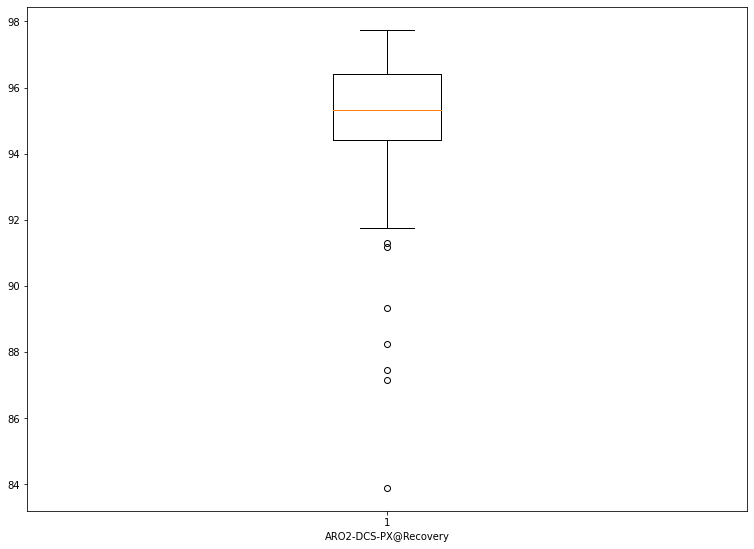

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlabel('ARO2-DCS-PX@Recovery')
bp = ax.boxplot(df_2['ARO2-DCS-PX@Recovery'].dropna().values)

plt.show()

# plt.show()

In [ ]:
# remove outliner
import numpy as np
for j in col[:-1]:
  mean = df_2[j].mean()
  std = df_2[j].std()
  outliner = []
  for i in range(len(df_2[j])):
    if (df_2.loc[i,j] > (mean - std*3) and df_2.loc[i,j] < (mean + std*3)):
      pass
    else:
      outliner = outliner + [i]
  print(j , mean, std, (mean - std*3), (mean + std*3))
  df_2.loc[outliner, j] = np.nan

ARO2-DCS-R911_2_L2_A 0.34056622138694365 0.028321521370802245 0.2556016572745369 0.4255307854993504
ARO2-DCS-R911_2_L3_A 1.5178935590586435 0.015611579455841757 1.4710588206911184 1.5647282974261687
ARO2-DCS-R911_2_L4_A -0.6175250909891187 0.013027245057278812 -0.6566068261609551 -0.5784433558172822
ARO2-DCS-R911_2_A_FA 0.4874220067358027 0.007472308165316249 0.465005082239854 0.5098389312317515
ARO2-DCS-R911_2_HF 130.14778882834878 0.9610515248024099 127.26463425394155 133.030943402756
ARO2-LIMS-S708@PX 23.215629131833385 0.893757955895843 20.534355264145855 25.896902999520915
ARO2-LIMS-s922@PX 99.70040966726884 0.7576715265170796 97.4273950877176 101.97342424682009
ARO2-LIMS-s922@MX 1548.0655523635414 5004.958159130441 -13466.808925027783 16562.940029754864
ARO2-LIMS-S907@PX 34.92006892487127 6.490145658809427 15.449631948442992 54.390505901299555
ARO2-LIMS-S905@PX 0.7782758434134727 1.6359867129978283 -4.129684295580011 5.6862359824069575
ARO2-DCS-PX@Recovery 95.27424809424802 1.269

In [ ]:
df_3 = df_2[x_col].dropna(axis="index").join(df_2.loc[df_2[x_col].dropna(axis="index").index.tolist(), y_col])
df_3

,ARO2-DCS-R911_2_L2_A,ARO2-DCS-R911_2_L3_A,ARO2-DCS-R911_2_L4_A,ARO2-DCS-R911_2_A_FA,ARO2-DCS-R911_2_HF,ARO2-LIMS-S708@PX,ARO2-LIMS-s922@PX,ARO2-LIMS-s922@MX,ARO2-LIMS-S907@PX,ARO2-LIMS-S905@PX,ARO2-DCS-PX@Recovery,time
0,0.315932,1.509901,-0.590059,0.480,129.987991,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:00:00
1,0.315643,1.509901,-0.590059,0.480,129.987991,23.077,99.699997,1330.0,34.433998,0.409,96.28,2017-01-01 01:00:00
2,0.315122,1.509901,-0.590059,0.480,129.987991,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 02:00:00
3,0.314822,1.509901,-0.590059,0.480,129.987991,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 03:00:00
4,0.314041,1.509901,-0.590059,0.480,129.987991,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
38492,0.372907,1.535203,-0.620062,0.502,131.988205,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-23 20:00:00
38493,0.372907,1.535203,-0.620062,0.502,131.988205,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-23 21:00:00
38494,0.372907,1.535203,-0.620062,0.502,131.988205,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-23 22:00:00
38495,0.372907,1.535203,-0.620062,0.502,131.988205,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-23 23:00:00


In [ ]:
df_3[col].describe()

,ARO2-DCS-R911_2_L2_A,ARO2-DCS-R911_2_L3_A,ARO2-DCS-R911_2_L4_A,ARO2-DCS-R911_2_A_FA,ARO2-DCS-R911_2_HF,ARO2-LIMS-S708@PX,ARO2-LIMS-s922@PX,ARO2-LIMS-s922@MX,ARO2-LIMS-S907@PX,ARO2-LIMS-S905@PX,ARO2-DCS-PX@Recovery
count,37304.000000,37304.000000,37304.000000,37304.000000,37304.000000,3848.000000,3817.000000,3808.000000,1291.000000,1320.000000,1435.000000
mean,0.339777,1.518350,-0.619080,0.487262,130.156463,23.210759,99.714902,1460.642069,35.750868,0.692255,95.307352
std,0.021755,0.014698,0.006531,0.007033,0.555522,0.330917,0.011668,93.800028,4.305170,0.471584,1.165897
min,0.290000,1.500000,-0.650065,0.470000,129.987991,21.368000,99.408997,151.000000,15.683000,0.068000,91.740000
25%,0.319982,1.500000,-0.620062,0.481000,129.987991,23.000000,99.708000,1391.000000,34.153000,0.304750,94.435000
50%,0.339964,1.524752,-0.620062,0.486000,129.987991,23.265500,99.714996,1482.000000,36.020000,0.636500,95.320000
75%,0.358866,1.535203,-0.620062,0.494000,129.987991,23.431999,99.721001,1528.000000,37.756001,0.941250,96.420000
max,0.425041,1.550055,-0.580058,0.502000,131.988205,24.400999,99.820999,1755.000000,46.195999,5.365000,97.750000


In [ ]:
df_3_describe = df_3[col].describe()
df_3_describe.iloc[:,5:8]

,ARO2-LIMS-S708@PX,ARO2-LIMS-s922@PX,ARO2-LIMS-s922@MX
count,3848.000000,3817.000000,3808.000000
mean,23.210759,99.714902,1460.642069
std,0.330917,0.011668,93.800028
min,21.368000,99.408997,151.000000
25%,23.000000,99.708000,1391.000000
50%,23.265500,99.714996,1482.000000
75%,23.431999,99.721001,1528.000000
max,24.400999,99.820999,1755.000000


<font size = 5>Analysis</font>
*   ARO2-LIMS-S708@PX
*   ARO2-LIMS-s922@PX
*   ARO2-LIMS-s922@MX


corr

In [ ]:
df_3_corr = df_3[col].corr()[y_col[:6]]
df_3_corr.iloc[:,:3]

,ARO2-LIMS-S708@PX,ARO2-LIMS-s922@PX,ARO2-LIMS-s922@MX
ARO2-DCS-R911_2_L2_A,0.262937,0.112121,0.636089
ARO2-DCS-R911_2_L3_A,0.212978,0.054991,0.707673
ARO2-DCS-R911_2_L4_A,0.186892,0.047536,-0.291190
ARO2-DCS-R911_2_A_FA,0.469116,0.043854,0.728205
ARO2-DCS-R911_2_HF,0.377031,-0.192516,0.448354
ARO2-LIMS-S708@PX,1.000000,0.152819,0.315440
ARO2-LIMS-s922@PX,0.152819,1.000000,-0.264791
ARO2-LIMS-s922@MX,0.315440,-0.264791,1.000000
ARO2-LIMS-S907@PX,0.051067,0.046676,-0.062901
ARO2-LIMS-S905@PX,0.188855,0.103958,0.198481


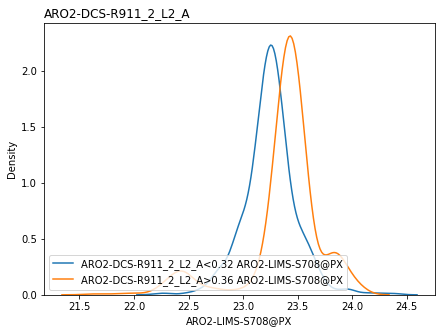

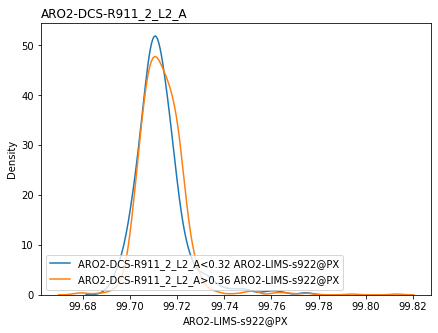

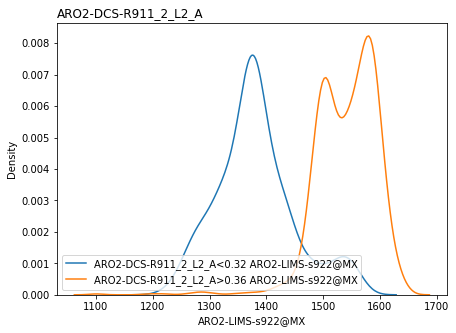

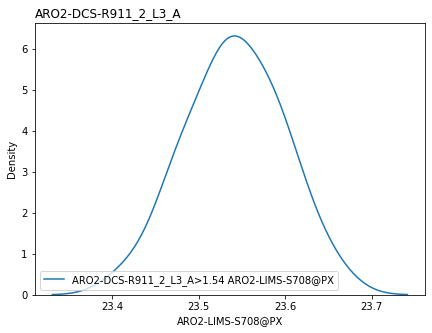

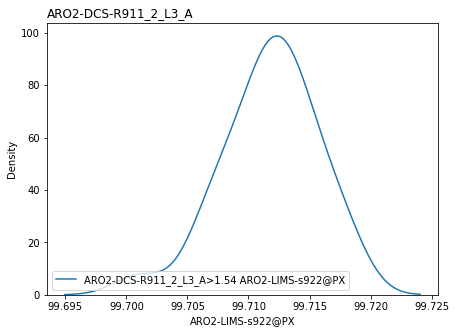

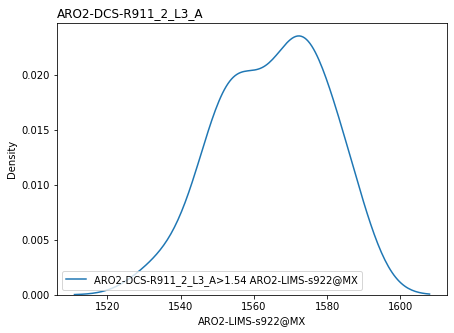

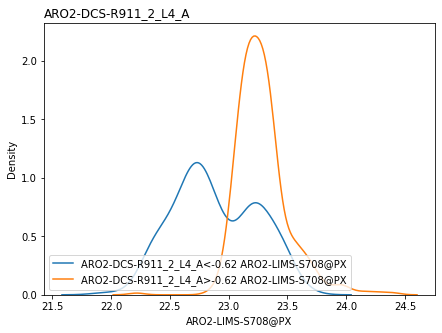

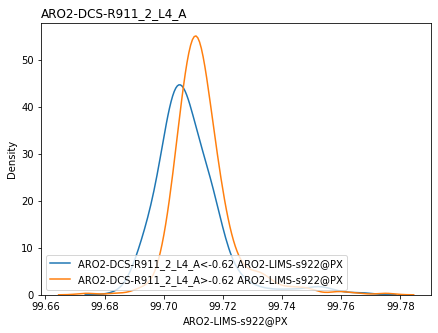

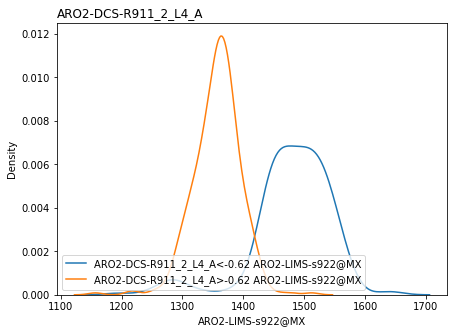

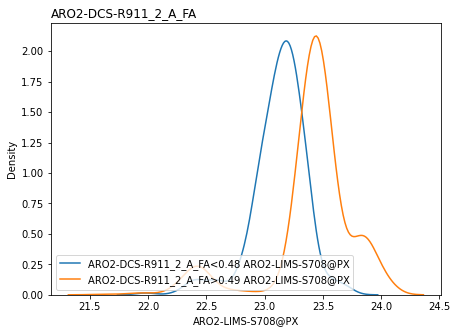

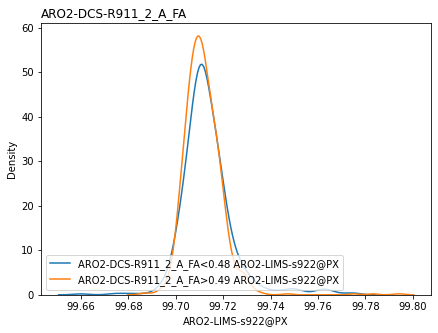

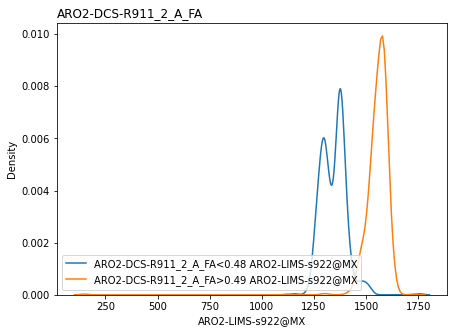

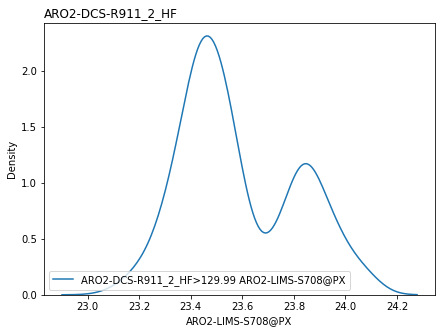

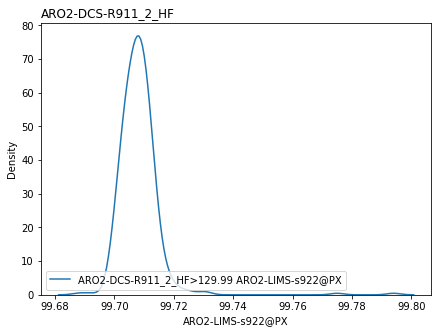

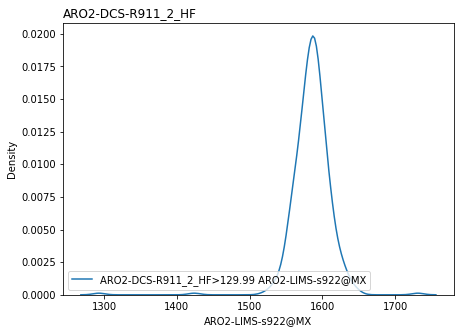

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

for i in x_col:
  for j in y_col[:3]:
    f, ax = plt.subplots(figsize = (7, 5))
    ax.set_title(i, loc = 'left')
    label_L = i + "<" + str("{:.2f}".format(df_3_describe.loc["25%", i])) + " "+ j
    label_U = i + ">" + str("{:.2f}".format(df_3_describe.loc["75%", i])) + " "+ j
    sb.kdeplot(df_3.loc[df_3[i] < df_3_describe.loc["25%", i], j], label = label_L)
    sb.kdeplot(df_3.loc[df_3[i] > df_3_describe.loc["75%", i], j], label = label_U)
    plt.legend(loc = "lower left")

xgboost

['ARO2-DCS-R911_2_A_FA', 'ARO2-DCS-R911_2_HF', 'ARO2-DCS-R911_2_L2_A', 'ARO2-DCS-R911_2_L3_A', 'ARO2-DCS-R911_2_L4_A'] : ARO2-LIMS-S708@PX
[05:57:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO2-LIMS-S708@PX 驗證分數:'

0.7603205004322166

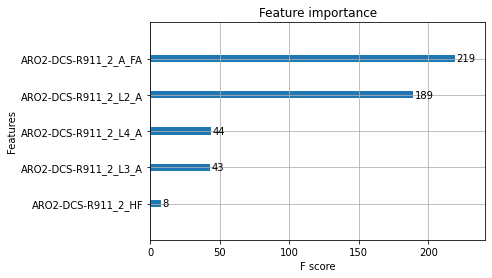

['ARO2-DCS-R911_2_HF', 'ARO2-DCS-R911_2_L2_A', 'ARO2-DCS-R911_2_L3_A', 'ARO2-DCS-R911_2_L4_A', 'ARO2-DCS-R911_2_A_FA'] : ARO2-LIMS-s922@PX
[05:57:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO2-LIMS-s922@PX 驗證分數:'

0.3918478950061768

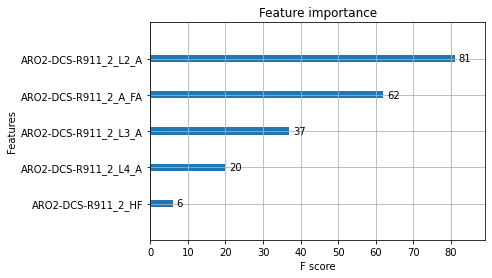

['ARO2-DCS-R911_2_A_FA', 'ARO2-DCS-R911_2_L3_A', 'ARO2-DCS-R911_2_L2_A', 'ARO2-DCS-R911_2_HF', 'ARO2-DCS-R911_2_L4_A'] : ARO2-LIMS-s922@MX
[05:57:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO2-LIMS-s922@MX 驗證分數:'

0.8571455599729498

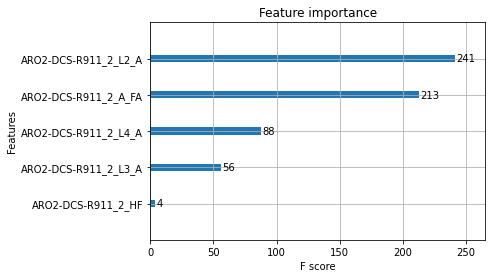

In [ ]:
from sklearn.linear_model import LinearRegression
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from xgboost import plot_importance

for i in y_col[:3]:
  y_label = i
  features = df_3_corr.abs().loc[x_col, y_label].sort_values(ascending=False).index.tolist()
  print(features,':',y_label)
  # for i in df_mean[x_col].columns:
  #   df_mean[i] = pd.to_numeric(df_mean[i],errors='coerce') 
  df_3_xgbr = df_3[features+[y_label]].dropna(axis=0)


  X = df_3_xgbr[features]
  y = df_3_xgbr[y_label]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = XGBRegressor()
  model.fit(X_train,y_train)
  display(f'{y_label} 驗證分數:',model.score(X_test,y_test))
  plot_importance(model)
  plt.show()

<font size = 5>Analysis</font>
*   ARO2-LIMS-S907@PX
*   ARO2-LIMS-S905@PX
*   ARO2-DCS-PX@Recovery

corr

In [ ]:
df_3_1_24_corr = df_3[col].corr()[y_col[:6]]
df_3_1_24_corr.iloc[:,3:6]

,ARO2-LIMS-S907@PX,ARO2-LIMS-S905@PX,ARO2-DCS-PX@Recovery
ARO2-DCS-R911_2_L2_A,-0.139578,0.292696,-0.943747
ARO2-DCS-R911_2_L3_A,-0.132203,0.247673,-0.860398
ARO2-DCS-R911_2_L4_A,0.067102,-0.075000,0.209547
ARO2-DCS-R911_2_A_FA,-0.086506,0.272505,-0.903184
ARO2-DCS-R911_2_HF,-0.074441,0.160057,-0.526867
ARO2-LIMS-S708@PX,0.051067,0.188855,-0.450964
ARO2-LIMS-s922@PX,0.046676,0.103958,-0.126295
ARO2-LIMS-s922@MX,-0.062901,0.198481,-0.721526
ARO2-LIMS-S907@PX,1.000000,-0.029046,0.121066
ARO2-LIMS-S905@PX,-0.029046,1.000000,-0.311106


In [ ]:
df_3_1_24_describe = df_3[col].describe()
df_3_1_24_describe.iloc[:,8:11]

,ARO2-LIMS-S907@PX,ARO2-LIMS-S905@PX,ARO2-DCS-PX@Recovery
count,1291.000000,1320.000000,1435.000000
mean,35.750868,0.692255,95.307352
std,4.305170,0.471584,1.165897
min,15.683000,0.068000,91.740000
25%,34.153000,0.304750,94.435000
50%,36.020000,0.636500,95.320000
75%,37.756001,0.941250,96.420000
max,46.195999,5.365000,97.750000


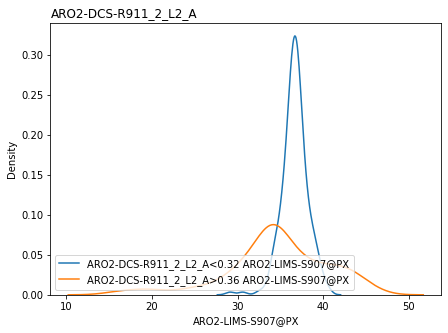

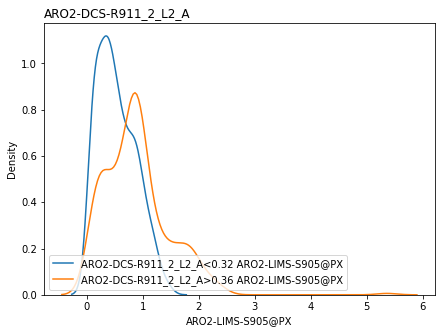

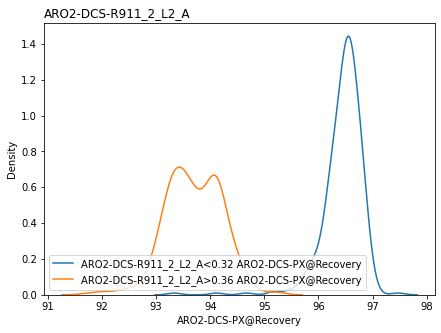

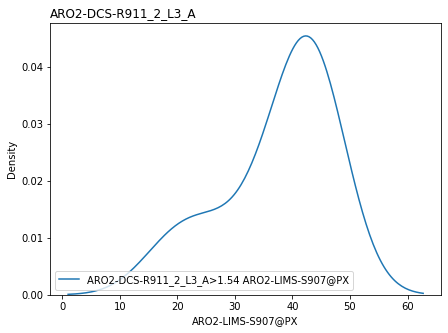

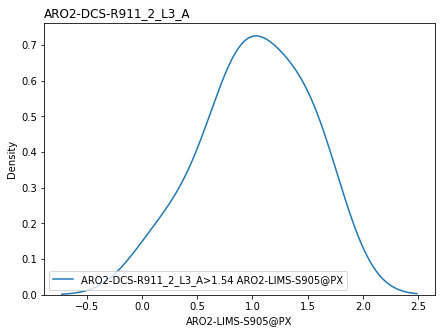

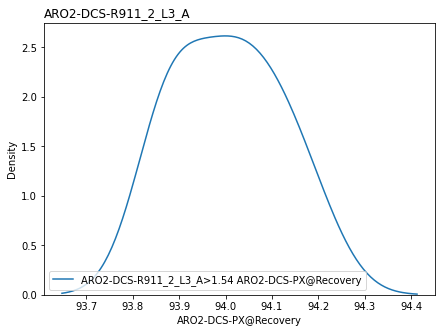

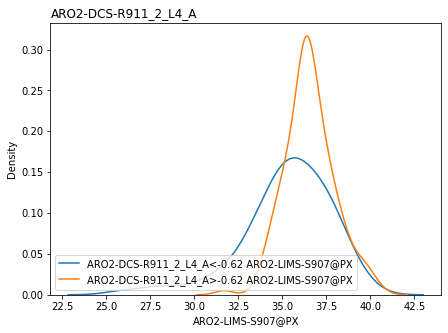

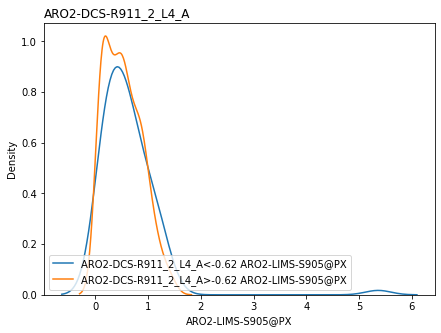

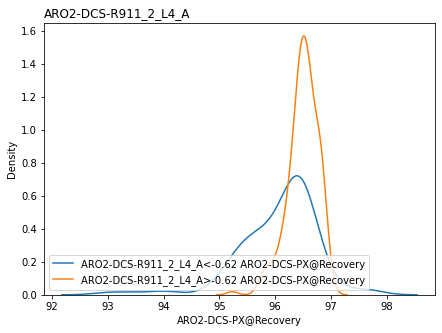

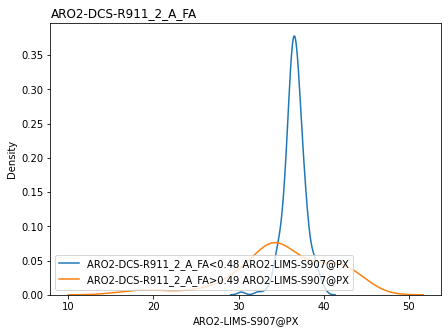

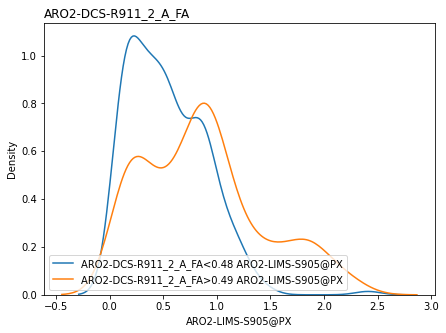

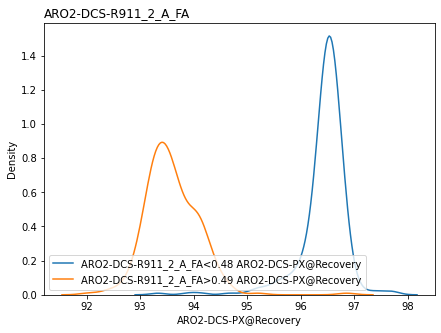

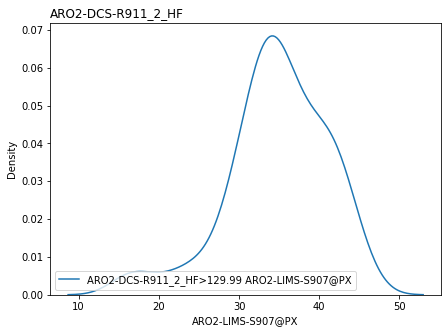

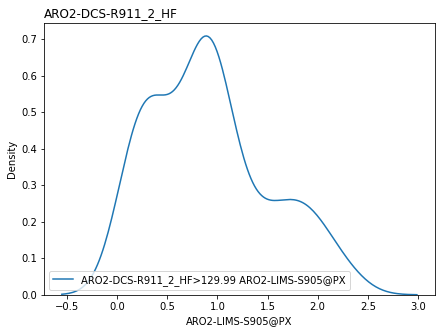

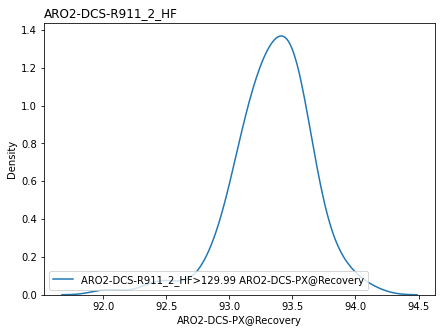

In [ ]:
for i in x_col:
  for j in y_col[3:6]:
    f, ax = plt.subplots(figsize = (7, 5))
    ax.set_title(i, loc = 'left')
    label_L = i + "<" + str("{:.2f}".format(df_3_1_24_describe.loc["25%", i])) + " "+ j
    label_U = i + ">" + str("{:.2f}".format(df_3_1_24_describe.loc["75%", i])) + " "+ j
    sb.kdeplot(df_3.loc[df_3[i] < df_3_1_24_describe.loc["25%", i], j], label = label_L)
    sb.kdeplot(df_3.loc[df_3[i] > df_3_1_24_describe.loc["75%", i], j], label = label_U)
    plt.legend(loc = "lower left")

['ARO2-DCS-R911_2_A_FA', 'ARO2-DCS-R911_2_HF', 'ARO2-DCS-R911_2_L2_A', 'ARO2-DCS-R911_2_L3_A', 'ARO2-DCS-R911_2_L4_A'] : ARO2-LIMS-S708@PX
[05:58:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO2-LIMS-S708@PX 驗證分數:'

0.7603205004322166

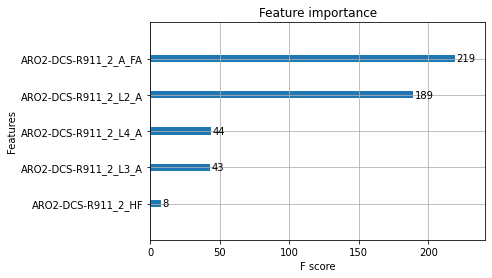

['ARO2-DCS-R911_2_HF', 'ARO2-DCS-R911_2_L2_A', 'ARO2-DCS-R911_2_L3_A', 'ARO2-DCS-R911_2_L4_A', 'ARO2-DCS-R911_2_A_FA'] : ARO2-LIMS-s922@PX
[05:58:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO2-LIMS-s922@PX 驗證分數:'

0.3918478950061768

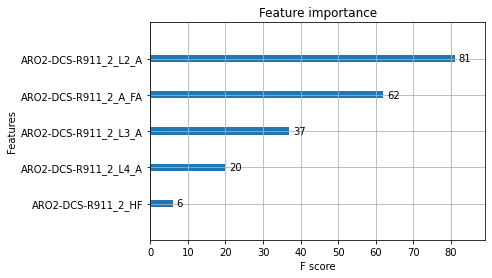

['ARO2-DCS-R911_2_A_FA', 'ARO2-DCS-R911_2_L3_A', 'ARO2-DCS-R911_2_L2_A', 'ARO2-DCS-R911_2_HF', 'ARO2-DCS-R911_2_L4_A'] : ARO2-LIMS-s922@MX
[05:58:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


'ARO2-LIMS-s922@MX 驗證分數:'

0.8571455599729498

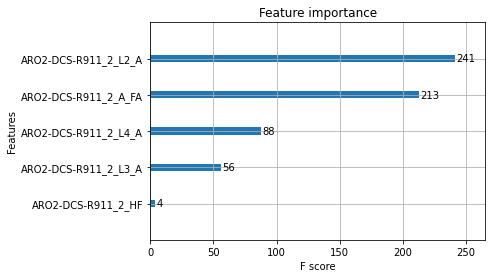

In [ ]:
for i in y_col[:3]:
  y_label = i
  features = df_3_1_24_corr.abs().loc[x_col, y_label].sort_values(ascending=False).index.tolist()
  print(features,':',y_label)
  # for i in df_mean[x_col].columns:
  #   df_mean[i] = pd.to_numeric(df_mean[i],errors='coerce') 
  df_3_1_24_xgbr = df_3[features+[y_label]].dropna(axis=0)


  X = df_3_1_24_xgbr[features]
  y = df_3_1_24_xgbr[y_label]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = XGBRegressor()
  model.fit(X_train,y_train)
  display(f'{y_label} 驗證分數:',model.score(X_test,y_test))
  plot_importance(model)
  plt.show()